In [1]:
%matplotlib inline

import sys
sys.path.append("../../ee595")
from deepsea import *

import numpy as np
import scipy as sp
import scipy.io as sio

import h5py

import seaborn as sns
import matplotlib.pyplot as plt

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 980 Ti (CNMeM is disabled, cuDNN 5005)


In [2]:
train_atac = np.load("traindata-multitask/train_atac.npy")
test_atac = np.load("traindata-multitask/test_atac.npy")
valid_atac = np.load("traindata-multitask/valid_atac.npy")

In [60]:
def quantize_matrix(m, partition=10, _bot=0, _top=1):
    ret = np.zeros((len(m), partition))
    step = 1.0/partition*(_top-_bot)
    for i in range(len(m)):
        j_max = int(np.round((m[i]-_bot)/step))
        for j in range(j_max):
            ret[i,j] = 1
    return ret

# Visual insepection

([], <a list of 0 Text yticklabel objects>)

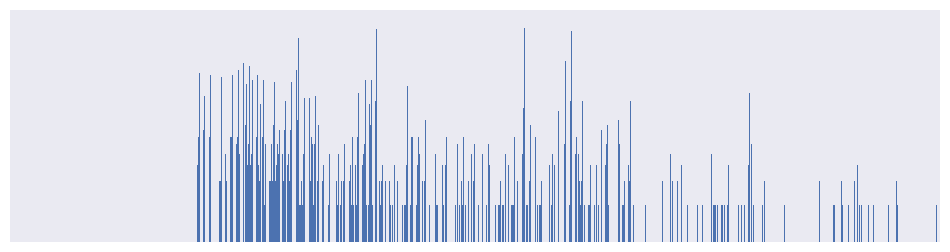

In [55]:
plt.figure(figsize=(12,3))
plt.bar(range(1000), train_atac[0][0, :, 0], linewidth=0)
plt.xticks([],[])
plt.yticks([],[])

In [57]:
max(train_atac[0][0, :, 0])

0.41490437852884149

([], <a list of 0 Text yticklabel objects>)

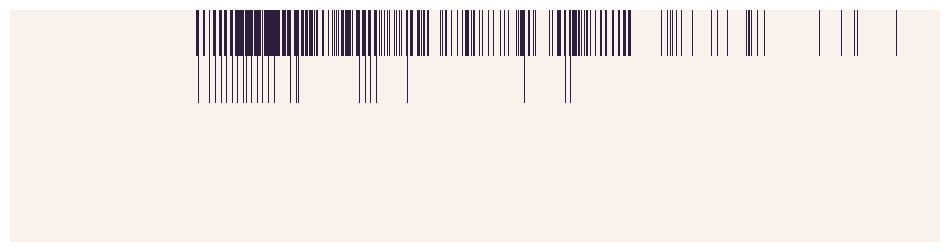

In [61]:
plt.figure(figsize=(12,3))
test = quantize_matrix(train_atac[0][0, :, 0], partition=5)
sns.heatmap(np.transpose(test), cbar=False)
plt.xticks([],[])
plt.yticks([],[])

# Data processing

In [80]:
data = test_atac
processed = []
for i in data:
    temp = i[0,:,0]
    qed = quantize_matrix(temp, partition=5)
    processed.append(qed)
processed = np.array(processed)
processed = np.expand_dims(processed, 1)
np.save("binary_atac_test.npy", processed)

In [ ]:
data = valid_atac
processed = []
for i in data:
    temp = i[0,:,0]
    qed = quantize_matrix(temp, partition=5)
    processed.append(qed)
processed = np.array(processed)
processed = np.expand_dims(processed, 1)
np.save("binary_atac_valid.npy", processed)

In [ ]:
data = train_atac
processed = []
for i in data:
    temp = i[0,:,0]
    qed = quantize_matrix(temp, partition=5)
    processed.append(qed)
processed = np.array(processed)
processed = np.expand_dims(processed, 1)
np.save("binary_atac_train.npy", processed)